# **Understanding and Addressing Customer Churn in Telecom**

**Customer churn**, the discontinuation of services by clients or subscribers, poses a **significant challenge** in the telecom industry. Amidst fierce competition and ever-expanding options for consumers, **accurately predicting** and **addressing churn** has become a **top priority** for telecom firms.

**Understanding the intricacies** of why customers leave is **paramount**. By delving into **customer behavior** and **engagement patterns**, telecom companies can uncover **valuable insights** that inform **proactive strategies** aimed at **retaining customers** and **sustaining profitability**.

**Strategic retention efforts** not only **preserve revenue streams** but also **enhance customer loyalty** and **market share**. By **prioritizing customer satisfaction** and **loyalty**, telecom companies can foster **long-term relationships** and **sustainable growth** in an ever-evolving market landscape.


# **Importing Libraries and Data**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import numpy as np
from sklearn import tree
from category_encoders import BinaryEncoder 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans


from IPython.display import HTML
import warnings

In [25]:
df = pd.read_excel('Pakistan-Telecom-Dataset.xlsx')

# **Exploring the Data**

### Churn Analysis

The dataset includes information on customers who left, commonly referred to as **Churn**. Analyzing churn is crucial for understanding customer retention and satisfaction.

**Churn Yes**: This indicates that the customer has churned, meaning they have *stopped using* the product or service, *terminated* their subscription, or *ceased* their engagement with the business.

**Churn No**: This indicates that the customer has *not churned* and is still *active*, meaning they *continue to use* the product or service, *maintain* their subscription, or *remain engaged* with the business.

Understanding customers' preferences and the factors influencing their attraction to the platform is essential for targeted marketing and service improvements.

- **Source of Attraction**: Indicates how the customer was attracted to the platform (e.g., advertisement, referral, organic search).
- **Preferences**: Insights into customer preferences, such as are they pleased with prices, services, or etc.

By analyzing these aspects, we aim to gain deeper insights into customer behavior, improve retention strategies, and enhance overall customer satisfaction.


In [26]:
df.head()
# "Churn: Yes"  mean that the user has discontinued or unsubscribed.
# "Churn: No" mean that the user is still subscribed or has not discontinued.

,Gender,Churn,Network,relation_durattion,service_type,source_of_attraction,prferred_communication,satisfy_with_call_rate,contact_with_cust_care,rate_of_cust_care_calling,reascon_of_contact_cc,monthly_usage_rs,Happy_with_intrnet_quality,4G_available,satisfy_with_voice_quality,satisfy_with_signal_strength,pleaseed_with_prices,satisfy_with_billing_process,recommend_to_others
0,Female,No,Jazz / Warid,More than one year,Pre Paid,Advertisement,messages,Yes,No,rarely,Complaints,800,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Female,No,Jazz / Warid,More than one year,Pre Paid,Others,Audio calling,No,Yes,rarely,Complaints,500,No,Yes,Yes,Yes,No,No,No
2,Male,No,Jazz / Warid,More than one year,Pre Paid,Advertisement,Audio calling,No,Yes,rarely,Complaints,500,Yes,Yes,No,No,No,Yes,Yes
3,Female,No,Jazz / Warid,More than one year,Pre Paid,Advertisement,messages,Yes,No,rarely,Information regarding new schemes,300,Yes,Yes,Yes,Yes,Yes,No,Yes
4,Male,No,Jazz / Warid,More than one year,Pre Paid,Face book,Audio calling,Yes,Yes,rarely,Complaints,800,Yes,Yes,Yes,Yes,No,No,Yes


In [27]:
df['Network'].unique()

array(['Jazz / Warid', 'Zong', 'Ufone', 'Telenor'], dtype=object)

In [28]:
df.isnull().sum()

Gender                          0
Churn                           0
Network                         0
relation_durattion              0
service_type                    0
source_of_attraction            0
prferred_communication          0
satisfy_with_call_rate          0
contact_with_cust_care          0
rate_of_cust_care_calling       0
reascon_of_contact_cc           0
monthly_usage_rs                0
Happy_with_intrnet_quality      0
4G_available                    0
satisfy_with_voice_quality      0
satisfy_with_signal_strength    0
pleaseed_with_prices            0
satisfy_with_billing_process    0
recommend_to_others             0
dtype: int64

In [29]:
df.shape

(9760, 19)

In [30]:
df.columns

Index(['Gender', 'Churn', 'Network', 'relation_durattion', 'service_type',
       'source_of_attraction', 'prferred_communication',
       'satisfy_with_call_rate', 'contact_with_cust_care',
       'rate_of_cust_care_calling', 'reascon_of_contact_cc',
       'monthly_usage_rs', 'Happy_with_intrnet_quality', '4G_available',
       'satisfy_with_voice_quality', 'satisfy_with_signal_strength',
       'pleaseed_with_prices', 'satisfy_with_billing_process',
       'recommend_to_others'],
      dtype='object')

# **Correlation between Categorical Values**

**Correlation** is a statistical measure that describes the extent to which two variables change together. There are several types of correlation, each indicating a different relationship between the variables. The most common types of correlation include:

**Correlation** is a statistical measure that describes the extent to which two variables change together. There are several types of correlation, each indicating a different relationship between the variables. The most common types of correlation include:

**Pearson Correlation Coefficient (r):**
  - Measures the linear relationship between two continuous variables.
  - Values range from **-1 to 1**, where
    - **1** indicates a perfect positive linear relationship,
    - **-1** indicates a perfect negative linear relationship
    - **0** indicates no linear relationship.
  - Assumes that the variables are **normally distributed**.

**Spearman's Rank Correlation Coefficient (ρ or rs):**
  - Measures the strength and direction of the **monotonic relationship** between two variables.
  - Particularly useful when dealing with **ordinal or ranked data**.
  - Does not assume **linearity** and is less sensitive to **outliers** than Pearson correlation.

**Kendall's Tau (τ):**
  - Similar to Spearman's correlation, Kendall's tau measures the strength and direction of a **monotonic relationship**.
  - It is based on the count of **concordant and discordant pairs** of data points.
  - Often considered more robust to **outliers** than Pearson correlation.

**Point-Biserial Correlation Coefficient:**
  - Measures the relationship between a **binary variable** and a **continuous variable**.
  - It is an extension of the Pearson correlation coefficient adapted for situations where one variable is **dichotomous**.

**Phi Coefficient (φ):**
  - Similar to the point-biserial correlation but used when both variables are **binary**.
  - Suitable for analyzing the association between two **dichotomous variables**.

**Cramér's V:**
  - Used to measure the association between two **nominal variables**.
  - Values range from **0 to 1**, where **0** indicates no association, and **1** indicates a perfect association.


It's important to note that **correlation does not imply causation**. Even if two variables are correlated, it does not necessarily mean that one variable causes the other to change. Correlation only measures the strength and direction of the relationship between two variables.

In [31]:
le = LabelEncoder()
le.fit_transform(df['Churn'])

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [33]:
df_cor = []
for i in df.columns:
    if i != 'Churn':
        contingency_table = pd.crosstab(df['Churn'], df[i]).values
        cramers_v_value = cramers_v(contingency_table)
        df_cor.append((i,cramers_v_value))
df_cor =  pd.DataFrame(df_cor, columns=['Feature', 'Correlation with Churn'])
df_cor

,Feature,Correlation with Churn
0,Gender,0.238071
1,Network,0.189057
2,relation_durattion,0.109199
3,service_type,0.016594
4,source_of_attraction,0.181621
5,prferred_communication,0.072417
6,satisfy_with_call_rate,0.320335
7,contact_with_cust_care,0.098532
8,rate_of_cust_care_calling,0.118695
9,reascon_of_contact_cc,0.350315


# **Obtaining Different Networks Data**

In [34]:
df_updated = df.groupby('Network')

In [35]:
df_jazz = df_updated.get_group('Jazz / Warid')
df_telenor = df_updated.get_group('Telenor')
df_ufone = df_updated.get_group('Ufone')
df_zong = df_updated.get_group('Zong')

# **Dashboard prepared in PowerBI**

In [36]:
dashboard_link = "https://app.powerbi.com/view?r=eyJrIjoiMDY1MzJjMWItOGU1NS00MjZhLWFkYzAtMDE5YjgyYzNlNWEyIiwidCI6IjViNzNkYWY5LTEyNWItNDZiNy1hY2ZmLTNkNjY2YmY5NGIwOSIsImMiOjl9"
embed_code = f'<iframe width="800" height="600" src="{dashboard_link}" frameborder="0" allowFullScreen="true"></iframe>'
HTML(embed_code)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\display.py:431: UserWarning:

Consider using IPython.display.IFrame instead



# **Preparing Data for Visualization**

In [37]:
Network = ['Jazz / Warid', 'Zong', 'Ufone', 'Telenor']

count_rare = [
    (df_jazz['rate_of_cust_care_calling'] == 'rarely').value_counts().get(True, 0),
    (df_zong['rate_of_cust_care_calling'] == 'rarely').value_counts().get(True, 0),
    (df_ufone['rate_of_cust_care_calling'] == 'rarely').value_counts().get(True, 0),
    (df_telenor['rate_of_cust_care_calling'] == 'rarely').value_counts().get(True, 0)
]

count_year = [
    (df_jazz['rate_of_cust_care_calling'] == 'Once in a year').value_counts().get(True, 0),
    (df_zong['rate_of_cust_care_calling'] == 'Once in a year').value_counts().get(True, 0),
    (df_ufone['rate_of_cust_care_calling'] == 'Once in a year').value_counts().get(True, 0),
    (df_telenor['rate_of_cust_care_calling'] == 'Once in a year').value_counts().get(True, 0)
]

count_month = [
    (df_jazz['rate_of_cust_care_calling'] == 'Once in a Month').value_counts().get(True, 0),
    (df_zong['rate_of_cust_care_calling'] == 'Once in a Month').value_counts().get(True, 0),
    (df_ufone['rate_of_cust_care_calling'] == 'Once in a Month').value_counts().get(True, 0),
    (df_telenor['rate_of_cust_care_calling'] == 'Once in a Month').value_counts().get(True, 0)
]

count_week = [
    (df_jazz['rate_of_cust_care_calling'] == 'Once in a Week').value_counts().get(True, 0),
    (df_zong['rate_of_cust_care_calling'] == 'Once in a Week').value_counts().get(True, 0),
    (df_ufone['rate_of_cust_care_calling'] == 'Once in a Week').value_counts().get(True, 0),
    (df_telenor['rate_of_cust_care_calling'] == 'Once in a Week').value_counts().get(True, 0)
]

In [38]:
df_bar = pd.DataFrame({
    'Network': ['Jazz / Warid', 'Zong', 'Ufone', 'Telenor'],
    'Rare (Count)': [4320, 1120, 360, 720],
    'Once in a year (Count)':[720, 120, 0, 120],
    'Once in a Month (Count)':[920, 400, 40, 80],
    'Once in a Week (Count)':[480, 160, 0, 200]
})

df_bar

,Network,Rare (Count),Once in a year (Count),Once in a Month (Count),Once in a Week (Count)
0,Jazz / Warid,4320,720,920,480
1,Zong,1120,120,400,160
2,Ufone,360,0,40,0
3,Telenor,720,120,80,200


In [39]:
fig = px.bar(df_bar, x='Network', y=['Rare (Count)','Once in a year (Count)','Once in a Month (Count)','Once in a Week (Count)'], barmode='stack', title='Customer Care Calling Rates by Network')
fig.update_layout(
    xaxis_title="Network", yaxis_title="Count"
)

In [40]:
Network = ['Jazz / Warid', 'Zong', 'Ufone', 'Telenor']

complains = [
    (df_jazz['reascon_of_contact_cc'] == 'Complaints').value_counts().get(True, 0),
    (df_zong['reascon_of_contact_cc'] == 'Complaints').value_counts().get(True, 0),
    (df_ufone['reascon_of_contact_cc'] == 'Complaints').value_counts().get(True, 0),
    (df_telenor['reascon_of_contact_cc'] == 'Complaints').value_counts().get(True, 0)
]

Information_schemes = [
    (df_jazz['reascon_of_contact_cc'] == 'Information regarding new schemes').value_counts().get(True, 0),
    (df_zong['reascon_of_contact_cc'] == 'Information regarding new schemes').value_counts().get(True, 0),
    (df_ufone['reascon_of_contact_cc'] == 'Information regarding new schemes').value_counts().get(True, 0),
    (df_telenor['reascon_of_contact_cc'] == 'Information regarding new schemes').value_counts().get(True, 0)
]

Other_Queries = [
    (df_jazz['reascon_of_contact_cc'] == 'Other Queries').value_counts().get(True, 0),
    (df_zong['reascon_of_contact_cc'] == 'Other Queries').value_counts().get(True, 0),
    (df_ufone['reascon_of_contact_cc'] == 'Other Queries').value_counts().get(True, 0),
    (df_telenor['reascon_of_contact_cc'] == 'Other Queries').value_counts().get(True, 0)
]

value_services = [
    (df_jazz['reascon_of_contact_cc'] == 'Value added services').value_counts().get(True, 0),
    (df_zong['reascon_of_contact_cc'] == 'Value added services').value_counts().get(True, 0),
    (df_ufone['reascon_of_contact_cc'] == 'Value added services').value_counts().get(True, 0),
    (df_telenor['reascon_of_contact_cc'] == 'Value added services').value_counts().get(True, 0)
]

In [41]:
df_bar_1 = pd.DataFrame({
    'Network': ['Jazz / Warid', 'Zong', 'Ufone', 'Telenor'],
    'Complaints (Count)': [2840, 520, 240, 400],
    'Information regarding new schemes (Count)':[1360, 360, 0, 120],
    'Other Queries (Count)':[1800, 720, 120, 360],
    'Value added services (Count)':[440, 200, 40, 240]
})

df_bar_1.columns

Index(['Network', 'Complaints (Count)',
       'Information regarding new schemes (Count)', 'Other Queries (Count)',
       'Value added services (Count)'],
      dtype='object')

In [42]:
fig = px.bar(df_bar_1, x='Network', y=['Network', 'Complaints (Count)','Information regarding new schemes (Count)', 'Other Queries (Count)', 'Value added services (Count)'], barmode='stack', title='Reason of Contacting Customer Care')
fig.update_layout(
    xaxis_title="Network", yaxis_title="Count"
)

# **Encoding Data for Machine Learning Model**


In [43]:
categorical_columns_binary = ['Churn', 'Gender', 'satisfy_with_call_rate',
                              'Happy_with_intrnet_quality', 'satisfy_with_voice_quality',
                              'satisfy_with_signal_strength', 'pleaseed_with_prices',
                              'satisfy_with_billing_process', 'recommend_to_others','4G_available'
                              ]

binary_encoder = BinaryEncoder(cols=categorical_columns_binary)
binary_encoded_df = binary_encoder.fit_transform(df)

categorical_columns_one_hot = df.drop(categorical_columns_binary, axis=1).columns
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns_one_hot, drop_first=True)

df_encoded = pd.concat([binary_encoded_df, one_hot_encoded_df], axis=1)
df_encoded.columns

Index(['Gender_0', 'Gender_1', 'Churn_0', 'Churn_1', 'Network',
       'relation_durattion', 'service_type', 'source_of_attraction',
       'prferred_communication', 'satisfy_with_call_rate_0',
       'satisfy_with_call_rate_1', 'contact_with_cust_care',
       'rate_of_cust_care_calling', 'reascon_of_contact_cc',
       'monthly_usage_rs', 'Happy_with_intrnet_quality_0',
       'Happy_with_intrnet_quality_1', '4G_available_0', '4G_available_1',
       'satisfy_with_voice_quality_0', 'satisfy_with_voice_quality_1',
       'satisfy_with_signal_strength_0', 'satisfy_with_signal_strength_1',
       'pleaseed_with_prices_0', 'pleaseed_with_prices_1',
       'satisfy_with_billing_process_0', 'satisfy_with_billing_process_1',
       'recommend_to_others_0', 'recommend_to_others_1', 'Gender', 'Churn',
       'satisfy_with_call_rate', 'Happy_with_intrnet_quality', '4G_available',
       'satisfy_with_voice_quality', 'satisfy_with_signal_strength',
       'pleaseed_with_prices', 'satisfy_with_b

# **Dropping Categorical Columns**

In [44]:
df_encoded = df_encoded.drop(['Network','relation_durattion', 'service_type', 'source_of_attraction','Gender',
                              'prferred_communication','4G_available','reascon_of_contact_cc', 'contact_with_cust_care', 'rate_of_cust_care_calling',
                              'Churn', 'satisfy_with_call_rate', 'Happy_with_intrnet_quality', 'satisfy_with_voice_quality', 'satisfy_with_signal_strength',
                              'pleaseed_with_prices', 'satisfy_with_billing_process', 'recommend_to_others'

                            ], axis=1)

# **Testing Different Models**

**Probability estimates** represent the likelihood or confidence that a particular sample belongs to each class label according to the model's prediction.

For classification tasks, where the objective is to predict the class label of each sample, **log loss serves as a cost function** that penalizes the model based on the discrepancy between its predicted probabilities and the true labels. Models that make more confident and accurate predictions will have **lower log loss values**, while models that are uncertain or make incorrect predictions will have **higher log loss values**.


DecisionTree Train Accuracy: 92, Test Accuracy: 91, Validation Loss: 0.16960429005106858
RandomForest Train Accuracy: 94, Test Accuracy: 93, Validation Loss: 0.1922586099325858
BernoulliNB Train Accuracy: 86, Test Accuracy: 85, Validation Loss: 1.070508671103005
LogisticRegression Train Accuracy: 89, Test Accuracy: 89, Validation Loss: 0.20049489722103706
SVM Train Accuracy: 81, Test Accuracy: 80, Validation Loss: 0.3009372307356901


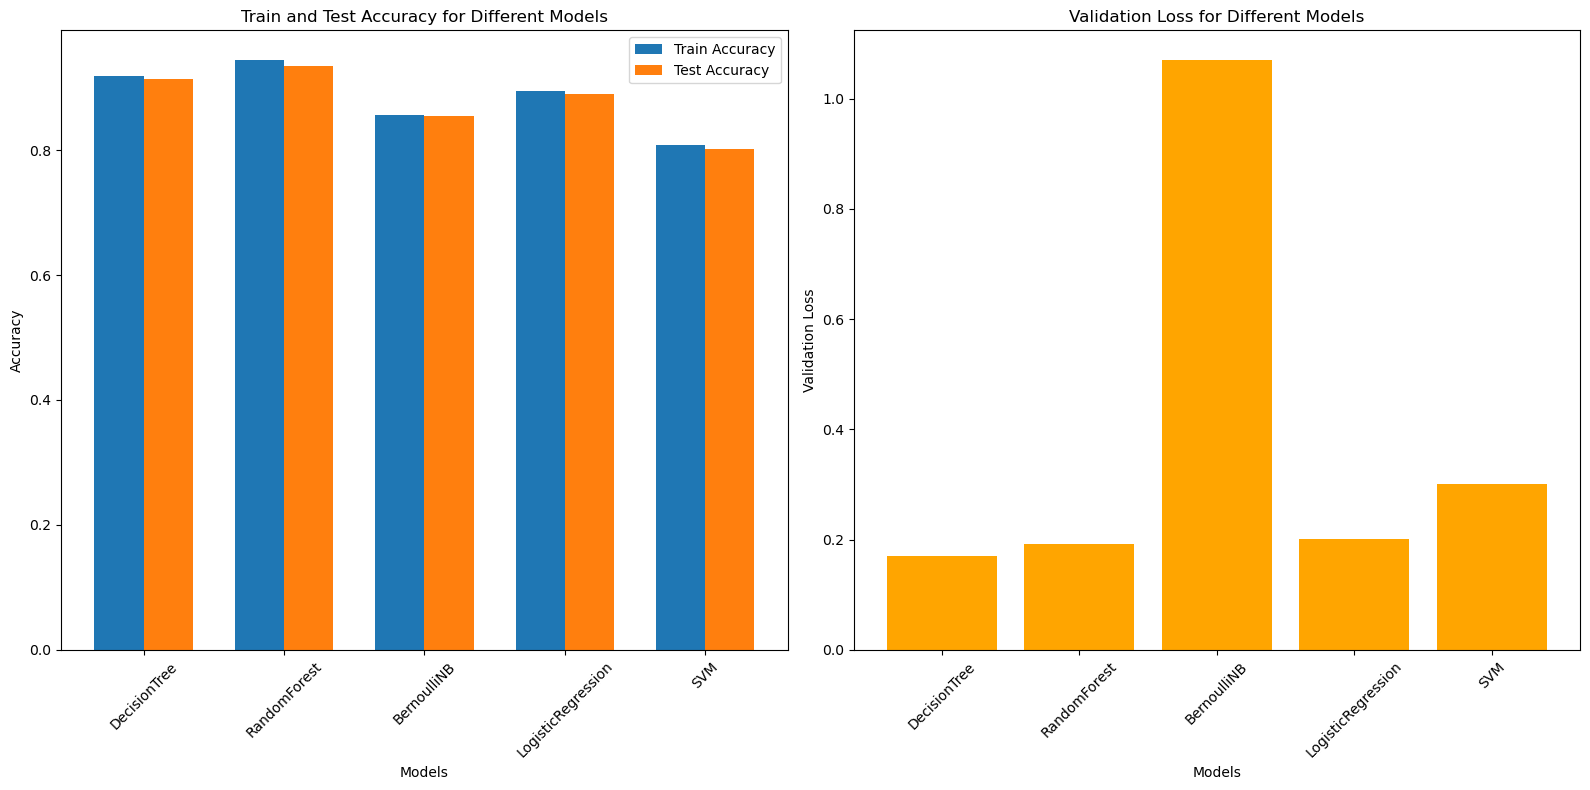

In [50]:
# Assuming df_encoded is defined somewhere in your code
x = df_encoded.drop(['Churn_0', 'Churn_1'], axis=1)
y = df_encoded[['Churn_1']].values.ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    # Add preprocessing steps here if needed
    ('classifier', None)
])

models = [
    ('DecisionTree', DecisionTreeClassifier(max_depth=5)),
    ('RandomForest', RandomForestClassifier(max_depth=5)),
    ('BernoulliNB', BernoulliNB()),
    ('LogisticRegression', LogisticRegression(max_iter=1000)),
    ('SVM', SVC(probability=True))  # Set probability=True for SVC
]

train_accuracies = []
test_accuracies = []
validation_losses = []

for model_name, model in models:
    pipeline.set_params(classifier=model)
    pipeline.fit(x_train, y_train)
    
    train_accuracy = pipeline.score(x_train, y_train)
    test_accuracy = pipeline.score(x_test, y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    if hasattr(model, "predict_proba"):
        try:
            y_pred_proba = pipeline.predict_proba(x_test)
            loss = log_loss(y_test, y_pred_proba)
            validation_losses.append(loss)
            print(f"{model_name} Train Accuracy: {round(train_accuracy * 100)}, Test Accuracy: {round(test_accuracy * 100)}, Validation Loss: {loss}")
        except AttributeError:
            print(f"{model_name} Train Accuracy: {round(train_accuracy * 100)}, Test Accuracy: {round(test_accuracy * 100)}, Validation Loss: Not available")
    else:
        print(f"{model_name} Train Accuracy: {round(train_accuracy * 100)}, Test Accuracy: {round(test_accuracy * 100)}, Validation Loss: Not available")

# Plotting
plt.figure(figsize=(16, 8))

# Train and Test Accuracy Plot
plt.subplot(1, 2, 1)
x_labels = [model[0] for model in models]
x_indexes = np.arange(len(x_labels))
width = 0.35

plt.bar(x_indexes - width/2, train_accuracies, width=width, label='Train Accuracy')
plt.bar(x_indexes + width/2, test_accuracies, width=width, label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different Models')
plt.xticks(ticks=x_indexes, labels=x_labels, rotation=45)
plt.legend()

# Validation Loss Plot
plt.subplot(1, 2, 2)
plt.bar(x_indexes, validation_losses, color='orange')
plt.xlabel('Models')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Different Models')
plt.xticks(ticks=x_indexes, labels=x_labels, rotation=45)

plt.tight_layout()
plt.show()